In [1]:
import numpy as np, pandas as pd, seaborn as sns, sklearn

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\master\Documents\pandas\titanic.csv")

df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [23]:
df.isna().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [24]:
df.loc[df['embark_town'].isnull()]

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [24]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [25]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace = True)

In [26]:
df['deck'].isnull().mean() * 100

77.21661054994388

<Axes: xlabel='age', ylabel='Count'>

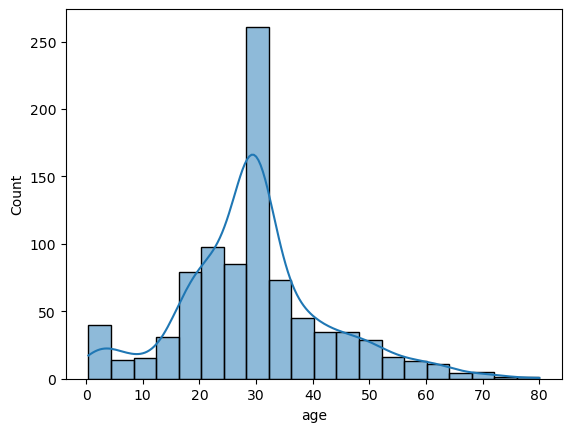

In [27]:
sns.histplot(data = df, x='age',bins=20, kde=True)

<Axes: xlabel='pclass', ylabel='count'>

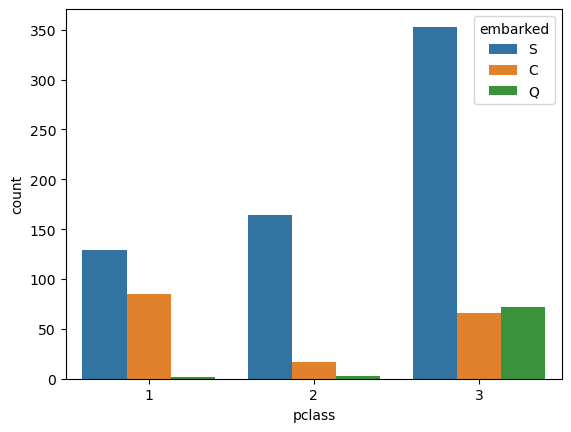

In [28]:
sns.countplot(data = df,x='pclass', hue='embarked')

<Axes: xlabel='embarked', ylabel='count'>

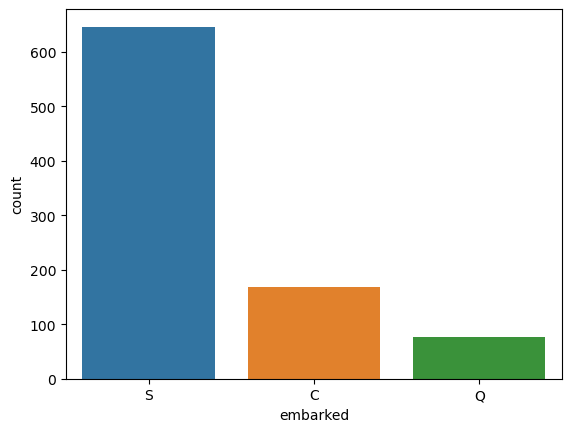

In [49]:
sns.countplot(data=df, x='embarked')

<Axes: xlabel='survived', ylabel='count'>

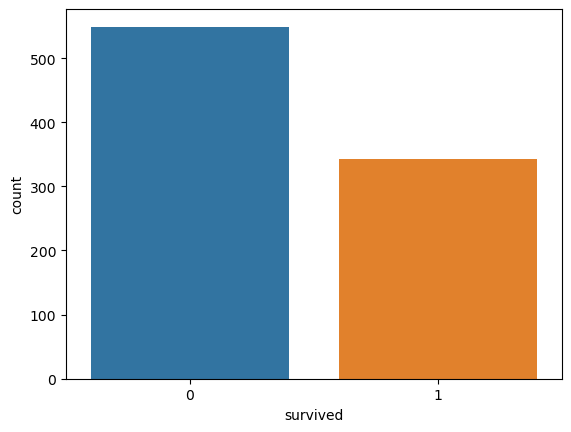

In [29]:
sns.countplot(data=df, x='survived')

<Axes: xlabel='survived', ylabel='Count'>

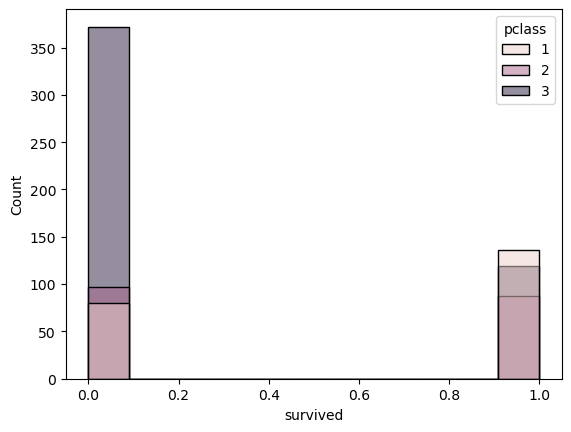

In [30]:
sns.histplot(data=df,x='survived',hue='pclass')

<Axes: xlabel='age', ylabel='Count'>

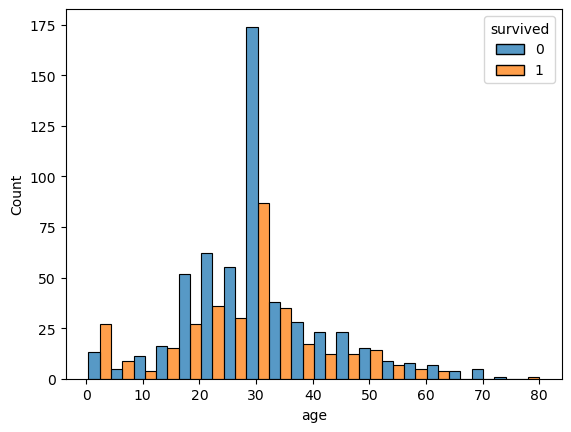

In [48]:
sns.histplot(data = df, x='age', bins=20, hue='survived', multiple='dodge')

In [32]:
a = df['age'].quantile([ele/10 for ele in range(0,11)])
a

0.0     0.420000
0.1    16.000000
0.2    20.000000
0.3    24.000000
0.4    28.000000
0.5    29.699118
0.6    29.699118
0.7    32.500000
0.8    38.000000
0.9    47.000000
1.0    80.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

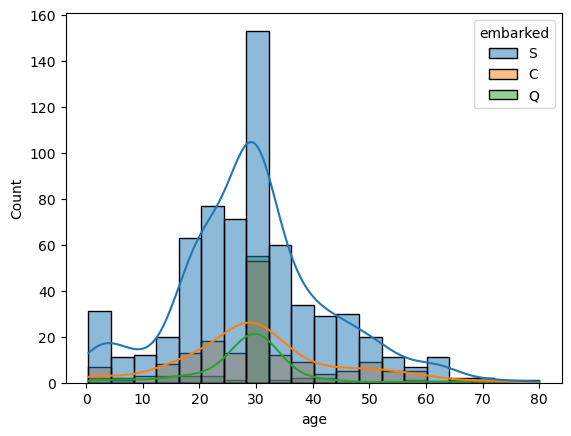

In [33]:
sns.histplot(data=df, x='age', hue='embarked', bins=20, kde=True)

In [34]:
df1, df2 = df.copy(), df.copy()

<Axes: xlabel='age', ylabel='Density'>

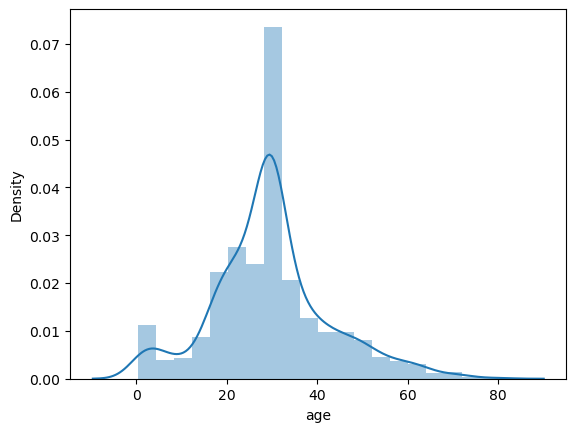

In [35]:
sns.distplot(df['age'], kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

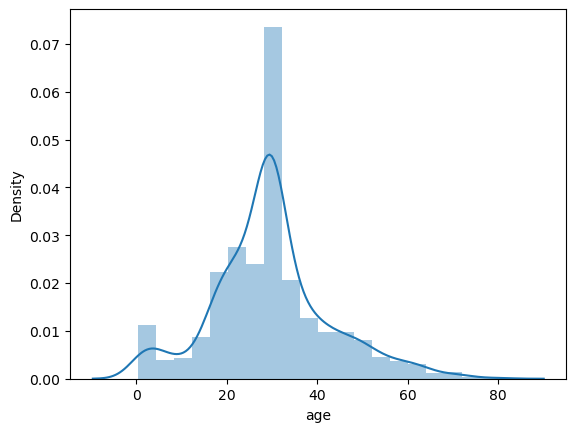

In [36]:
sns.distplot(df['age'].fillna(df['age'].median()), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

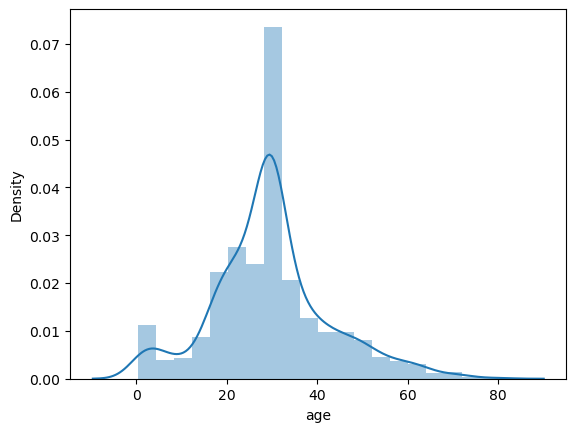

In [37]:
sns.distplot(df['age'].fillna(df['age'].mean()), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

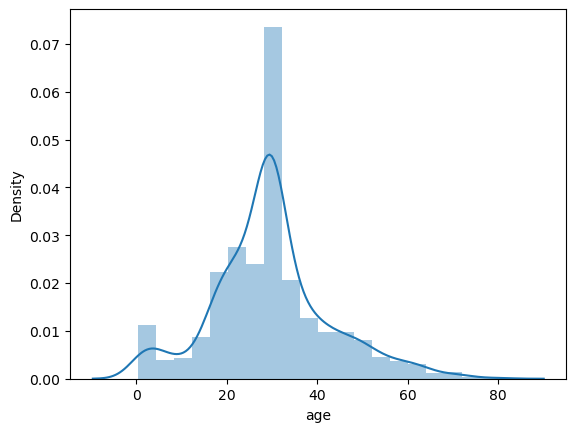

In [38]:
sns.distplot(df.groupby(['embarked'])['age'].transform(lambda x : x.fillna(x.median())), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

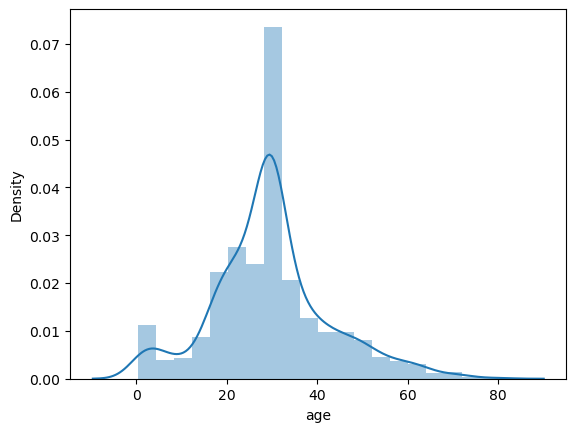

In [39]:
sns.distplot(df.groupby(['embarked'])['age'].transform(lambda x : x.fillna(x.mean())), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

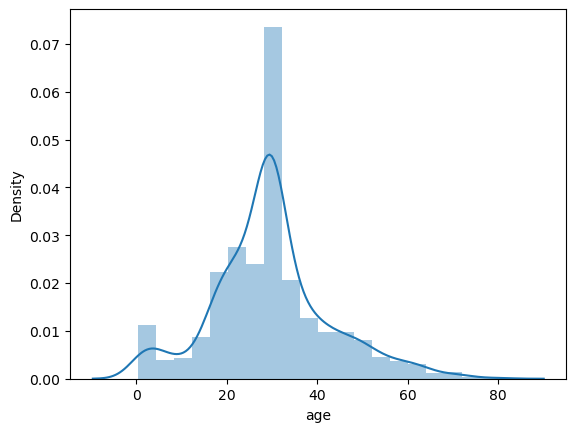

In [40]:
sns.distplot(df['age'].ffill().bfill(), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

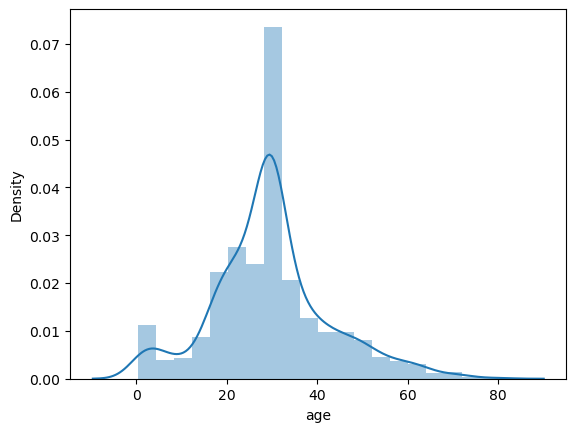

In [41]:
sns.distplot(df['age'], kde = True, hist = True, bins = 20)

In [42]:
def luFence(x):
    #x = x.sort()
    iqr = x.quantile(0.75) - x.quantile(0.25)
    lowerFence, upperFence = max(min(x), x.quantile(0.25)-1.5*iqr), min(max(x), x.quantile(0.75)+1.5*iqr)
    return lowerFence, upperFence

luFence(df['fare'])

(0.0, 65.6344)

<Axes: >

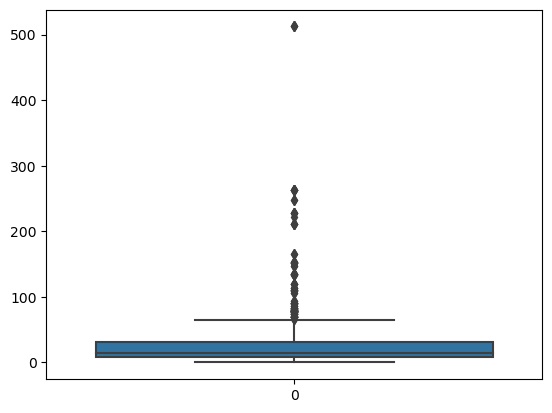

In [44]:
sns.boxplot(df['fare'])

In [45]:
df[df['fare']<=65.6344].groupby(['embark_town', 'pclass'])['fare'].median()

embark_town  pclass
Cherbourg    1         34.6542
             2         24.0000
             3          7.8958
Queenstown   2         12.3500
             3          7.7500
Southampton  1         30.5000
             2         13.5000
             3          8.0500
Name: fare, dtype: float64

In [6]:
df.groupby('pclass')['fare'].median()

pclass
1    60.2875
2    14.2500
3     8.0500
Name: fare, dtype: float64

<Axes: >

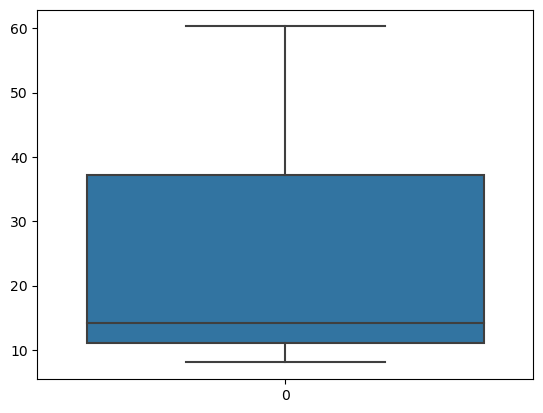

In [10]:
sns.boxplot([df.groupby('pclass')['fare'].median()])

In [46]:
df[(df['fare']>=60.2875) & (df['pclass']==1)]['fare'].describe()

count    108.000000
mean     132.179358
std       86.499434
min       61.175000
25%       79.200000
50%       93.500000
75%      151.550000
max      512.329200
Name: fare, dtype: float64